In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures, StandardScaler
from sklearn import tree,linear_model,neighbors
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import iqr
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":10,"axes.titlesize":24,"axes.labelsize":24}) 


## Loading data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.columns

Index(['StoreID', 'Date', 'IsHoliday', 'IsOpen', 'HasPromotions', 'StoreType',
       'AssortmentType', 'NearestCompetitor', 'Region', 'NumberOfCustomers',
       'NumberOfSales', 'Region_AreaKM2', 'Region_GDP', 'Region_PopulationK',
       'CloudCover', 'Events', 'Max_Dew_PointC', 'Max_Gust_SpeedKm_h',
       'Max_Humidity', 'Max_Sea_Level_PressurehPa', 'Max_TemperatureC',
       'Max_VisibilityKm', 'Max_Wind_SpeedKm_h', 'Mean_Dew_PointC',
       'Mean_Humidity', 'Mean_Sea_Level_PressurehPa', 'Mean_TemperatureC',
       'Mean_VisibilityKm', 'Mean_Wind_SpeedKm_h', 'Min_Dew_PointC',
       'Min_Humidity', 'Min_Sea_Level_PressurehPa', 'Min_TemperatureC',
       'Min_VisibilitykM', 'Precipitationmm', 'WindDirDegrees'],
      dtype='object')

In [3]:
histogramas = False
train.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,0,...,1,12.0,5,-6,48,1022,-5,5.0,0.0,46


In [4]:
test.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,Region_AreaKM2,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2018,0,1,0,Hyper Market,General,326,7,9643,...,6,14.0,5,-1,46,1011,2,10.0,0.00,180
1,1000,02/03/2018,0,1,0,Hyper Market,General,326,7,9643,...,4,12.0,6,-1,52,1009,3,10.0,5.08,315
2,1000,03/03/2018,0,1,0,Hyper Market,General,326,7,9643,...,3,13.0,11,-3,41,1013,-2,10.0,0.00,210
3,1000,04/03/2018,0,0,0,Hyper Market,General,326,7,9643,...,6,11.0,18,-2,65,1002,1,6.0,3.05,193
4,1000,05/03/2018,0,1,1,Hyper Market,General,326,7,9643,...,6,10.0,23,-5,25,1000,2,8.0,0.25,247


In [5]:
train.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,523021.000000,523021.000000,523021.000000,523021.000000,523021.00000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,...,523021.000000,511683.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,511683.000000,523021.000000,523021.000000
mean,1373.953914,0.029718,0.829714,0.383292,8002.71122,5.713151,259.325073,4057.377536,12381.265718,14050.547848,...,10.273205,12.151025,11.724961,3.737584,51.375624,1012.078435,6.202315,7.223408,0.808278,170.458096
std,216.395820,0.169808,0.375884,0.486189,11537.70753,3.357190,185.857102,2729.630381,9140.692427,2755.425404,...,7.041167,4.978385,5.791031,5.909098,19.284023,8.699236,6.312993,4.899575,2.631428,101.728193
min,1000.000000,0.000000,0.000000,0.000000,47.00000,0.000000,0.000000,0.000000,344.000000,9893.000000,...,-13.000000,0.000000,2.000000,-18.000000,10.000000,970.000000,-15.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1057.00000,3.000000,166.000000,2573.000000,7215.000000,11849.000000,...,4.000000,10.000000,8.000000,-1.000000,36.000000,1007.000000,1.000000,3.000000,0.000000,75.000000
50%,1373.000000,0.000000,1.000000,0.000000,3321.00000,6.000000,251.000000,4020.000000,9643.000000,15017.000000,...,11.000000,11.000000,11.000000,4.000000,51.000000,1013.000000,7.000000,8.000000,0.000000,191.000000
75%,1561.000000,0.000000,1.000000,1.000000,9673.00000,9.000000,345.000000,5538.000000,15566.000000,15931.000000,...,16.000000,14.000000,14.000000,8.000000,66.000000,1018.000000,11.000000,10.000000,0.250000,250.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.00000,10.000000,2206.000000,26641.000000,32221.000000,23931.000000,...,30.000000,31.000000,53.000000,18.000000,100.000000,1038.000000,24.000000,31.000000,58.930000,360.000000


In [6]:
test.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,Region_AreaKM2,Region_GDP,Region_PopulationK,CloudCover,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,37271.00000,...,45689.000000,43068.000000,45689.000000,45689.000000,45689.000000,45689.000000,45689.000000,43068.000000,45689.000000,45689.000000
mean,1374.000000,0.032787,0.822649,0.344262,7958.004005,5.556742,13216.973298,14140.499332,3940.098798,5.45797,...,7.009433,13.428323,12.471208,-1.208124,39.309549,1016.101381,1.852853,8.084959,0.462545,188.977522
std,216.219849,0.178080,0.381970,0.475132,11429.943820,3.369348,9793.699417,2730.696157,2782.135496,1.73856,...,3.530816,5.323993,6.766945,3.232898,15.820149,10.503942,3.287485,5.209967,1.275447,112.300400
min,1000.000000,0.000000,0.000000,0.000000,47.000000,0.000000,344.000000,9893.000000,816.000000,0.00000,...,-2.000000,2.000000,3.000000,-13.000000,8.000000,979.000000,-6.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1057.000000,2.000000,7215.000000,11849.000000,1584.000000,5.00000,...,4.000000,10.000000,8.000000,-3.000000,28.000000,1010.000000,0.000000,5.000000,0.000000,71.000000
50%,1374.000000,0.000000,1.000000,0.000000,3307.000000,6.000000,9643.000000,15017.000000,2770.000000,6.00000,...,7.000000,12.000000,11.000000,-1.000000,37.000000,1018.000000,2.000000,9.000000,0.000000,225.000000
75%,1561.000000,0.000000,1.000000,1.000000,9673.000000,9.000000,15566.000000,16186.000000,5727.000000,6.00000,...,9.000000,16.000000,14.000000,1.000000,50.000000,1024.000000,4.000000,10.000000,0.000000,273.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.000000,10.000000,32221.000000,23931.000000,8146.000000,8.00000,...,17.000000,31.000000,39.000000,9.000000,87.000000,1035.000000,12.000000,31.000000,11.940000,360.000000


Dropping tuples with IsOpen = 0 

In [7]:
train = train[train.IsOpen != 0]
train = train.drop(columns=['IsOpen'])
test = test[test.IsOpen != 0]
test = test.drop(columns=['IsOpen'])

## Categorical/NumberOfSales 

In [8]:
train['WindDirDegrees']= train['WindDirDegrees'].apply(lambda x : "Wind "+str(math.floor(x*8/360)))
train['WindDirDegrees']= train['WindDirDegrees'].apply(lambda x : "Wind 0" if x=="Wind 8" else x)

IsHoliday

In [9]:
holy = train['IsHoliday']

In [10]:
if histogramas:
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
    plt.figure(figsize=(5,5)) 
    sns.barplot(x=holy, y="NumberOfSales", data=train)

HasPromotions

In [11]:
promo = train['HasPromotions']

In [12]:
if histogramas:
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
    plt.figure(figsize=(5,5))   #this is the way to set the size of the following figure, i need to add it at each new figure
    sns.barplot(x=promo, y="NumberOfSales", data=train)

In [13]:
Stype = train['StoreType']

In [14]:
if histogramas:
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
    plt.figure(figsize=(10,5))   #this is the way to set the size of the following figure, i need to add it at each new figure
    sns.barplot(x=Stype, y="NumberOfSales", data=train)

In [15]:
Atype = train['AssortmentType']

In [16]:
if histogramas:
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
    plt.figure(figsize=(10,5))   #this is the way to set the size of the following figure, i need to add it at each new figure
    sns.barplot(x=Atype, y="NumberOfSales", data=train)

In [17]:
Region = train['Region']

In [18]:
if histogramas:
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
    plt.figure(figsize=(10,5))   #this is the way to set the size of the following figure, i need to add it at each new figure
    sns.barplot(x=Region, y="NumberOfSales", data=train)

In [19]:
CC = train['CloudCover']

In [20]:
if histogramas:
    plt.figure(figsize=(10,5))
    sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
    sns.barplot(x=CC, y="NumberOfSales", data=train)

In [21]:
Winds = train['WindDirDegrees']

In [22]:
if histogramas:
    plt.figure(figsize=(10,5))
    sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
    sns.barplot(x=Winds, y="NumberOfSales", data=train)

## Categorical/NumberOfCustomer 

In [23]:
if histogramas:
    plt.figure(figsize=(5,5))
    sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
    sns.barplot(x=holy, y="NumberOfCustomers", data=train)

In [24]:
if histogramas:
    plt.figure(figsize=(5,5))
    sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
    sns.barplot(x=promo, y="NumberOfCustomers", data=train)

In [25]:
if histogramas:
    plt.figure(figsize=(10,5))
    sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
    sns.barplot(x=Stype, y="NumberOfCustomers", data=train)

In [26]:
if histogramas:
    plt.figure(figsize=(10,5))
    sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
    sns.barplot(x=Atype, y="NumberOfCustomers", data=train)

In [27]:
if histogramas:
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
    plt.figure(figsize=(10,5))   #this is the way to set the size of the following figure, i need to add it at each new figure
    sns.barplot(x=Region, y="NumberOfCustomers", data=train)

In [28]:
if histogramas:
    plt.figure(figsize=(10,5))
    sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
    sns.barplot(x=CC, y="NumberOfCustomers", data=train)

In [29]:
if histogramas:
    plt.figure(figsize=(10,5))
    sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1})
    sns.barplot(x=Winds, y="NumberOfCustomers", data=train)

Plotting and transforming the distribution of the NumberOfSales   
Reducing Skewness of the distribution


 mu = 4890.09 and sigma = 2215.40

Skewness: 1.558774
Kurtosis: 4.691952


Text(0.5,1,'NumberOfSales distribution')

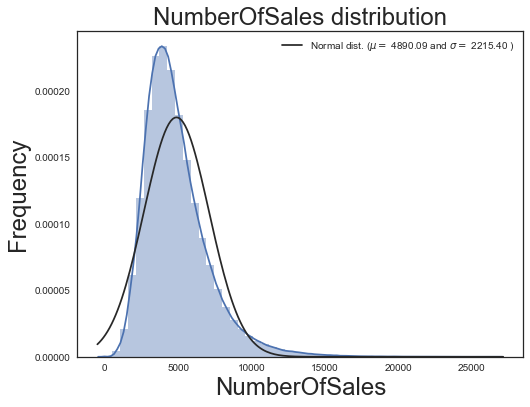

In [30]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

sns.distplot(train['NumberOfSales'] , fit=stats.norm)


(mu, sigma) = stats.norm.fit(train['NumberOfSales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % train['NumberOfSales'].skew())
print("Kurtosis: %f" % train['NumberOfSales'].kurt())

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')

In [31]:
train["NumberOfSales"] = np.log1p(train["NumberOfSales"])
train_target =  np.log1p(train["NumberOfSales"]).copy()
(mu, sigma) = stats.norm.fit(train['NumberOfSales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % train['NumberOfSales'].skew())
print("Kurtosis: %f" % train['NumberOfSales'].kurt())


 mu = 8.40 and sigma = 0.44

Skewness: -0.637384
Kurtosis: 10.145847


Text(0.5,1,'NumberOfSales distribution')

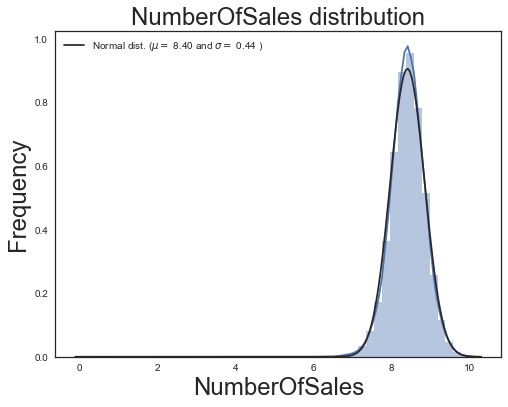

In [32]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
sns.distplot(train['NumberOfSales'] , fit=stats.norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('NumberOfSales distribution')

# Merging train and test

In [33]:
NumberOfCustomers = train['NumberOfCustomers']
all_data_index = train.columns.drop(['NumberOfSales','NumberOfCustomers'])
all_data = pd.concat((train.loc[:,all_data_index],test.loc[:,all_data_index]))

# One Hot Encoding

Encoding StoreType

In [34]:
StoreType = all_data['StoreType'];
all_data['StandardMarket'] = StoreType.apply(lambda x: 1 if x=='Standard Market' else 0);
all_data['HyperMarket'] = StoreType.apply(lambda x: 1 if x=='Hyper Market' else 0);
all_data['SuperMarket'] = StoreType.apply(lambda x: 1 if x=='Super Market' else 0);
all_data['ShoppingCenter'] = StoreType.apply(lambda x: 1 if x=='Shopping Center' else 0);

Encoding AssortmentType

In [35]:
TypeOfProducts = all_data['AssortmentType'];
all_data['General'] = TypeOfProducts.apply(lambda x: 1 if x=='General' else 0);
all_data['WithFishDepartment'] = TypeOfProducts.apply(lambda x: 1 if x=='With Fish Department' else 0);
all_data['WithNonFoodDepartment'] = TypeOfProducts.apply(lambda x: 1 if x=='With Non-Food Department' else 0);

Encoding Region

In [36]:
Region = all_data['Region'];
regionQuantity = Region.unique().size;
for i in range(0, regionQuantity-1):
    regionName = 'Region{}'.format(i);
    all_data[regionName] = Region.apply(lambda x: 1 if x==i else 0);

Encoding Month

In [37]:
months = []
all_date = all_data['Date']
for s in all_date:
    months.append(int(s[3:5]))
all_data['Month'] =months

In [38]:
import calendar

Month = all_data['Month'];
monthsQuantity = Month.unique().size
for i in range(1, monthsQuantity+1):
    monthName = calendar.month_name[i];
    all_data[monthName] = Month.apply(lambda x: 1 if x==i else 0);

Enconding days of the week

In [39]:
import datetime

Days = all_data['Date']
DoWs = []
for day in Days:
    d = int(day[0:2])
    month = int(day[3:5])
    year = int(day[6:10])
    Date = datetime.date(year,month,d)
    DoWs.append(calendar.day_name[Date.weekday()])

all_data['DoWs'] = DoWs
DoWs = all_data['DoWs'];
days = DoWs.unique()

for d in days:
    all_data[d] = DoWs.apply(lambda x: 1 if x==d else 0);

Encoding Events

In [40]:
def ExtractEvents(df,col,sep):
    df[col]=df[col].astype('str').apply(lambda x: 'Nothing' if x=='nan' else x)
    events=list(df[col].unique())
    for event in events:
        if sep in event:
            event=event.split(sep)
            for i in event:
                events.append(i)
    events=list({x for x in events if sep not in x})
    for event in events:
        df[event]=df[col].astype('str').apply(lambda x: 1 if event in x else 0)
    del df[col]
    return df

all_data=ExtractEvents(all_data,'Events','-')
all_data[['Snow','Rain','Nothing']].head(10)

,Snow,Rain,Nothing
0,1,1,0
1,1,0,0
2,0,1,0
3,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,1,0
9,0,1,0
10,0,1,0


Dropping WindDirDegrees

In [41]:
all_data = all_data.drop(labels='WindDirDegrees',axis=1)

In [42]:
all_data = all_data.drop(labels='StoreType', axis=1)
all_data = all_data.drop(labels='AssortmentType', axis=1)
all_data = all_data.drop(labels='Region', axis=1)
all_data = all_data.drop(labels='Month', axis=1)
all_data = all_data.drop(labels='Date', axis=1)
all_data = all_data.drop(labels='DoWs',axis=1)

In [43]:
all_data.head()

,StoreID,IsHoliday,HasPromotions,NearestCompetitor,Region_AreaKM2,Region_GDP,Region_PopulationK,CloudCover,Max_Dew_PointC,Max_Gust_SpeedKm_h,...,Saturday,Monday,Thursday,Sunday,Hail,Thunderstorm,Fog,Snow,Rain,Nothing
0,1000,0,0,326,9643,17130,2770,8.0,1,NaN,...,0,0,0,0,0,0,0,1,1,0
1,1000,0,0,326,9643,17130,2770,8.0,0,NaN,...,0,0,0,0,0,0,0,1,0,0
2,1000,0,0,326,9643,17130,2770,8.0,0,NaN,...,0,0,0,0,0,0,0,0,1,0
3,1000,0,0,326,9643,17130,2770,6.0,-3,NaN,...,1,0,0,0,0,0,0,0,0,1
5,1000,0,1,326,9643,17130,2770,NaN,-2,NaN,...,0,1,0,0,0,0,0,0,0,1


# Outliers Analysis

In [44]:
def WinsorizingIQR(df,col):
    ran = iqr(df[col])
    min_v = df.quantile(0.25)[col] - ran
    max_v = df.quantile(0.75)[col] + ran
    print("Outliers := "+ str(100*(df[col].loc[df[col] < min_v].shape[0] + df[col].loc[df[col] > max_v].shape[0])/df.shape[0])+ " %")
    df[col] = df[col].apply(lambda x: max_v if x > max_v else x)
    df[col] = df[col].apply(lambda x: min_v if x < min_v else x)

Division of features

In [45]:
bool_cols = [col for col in all_data if all_data[col].dropna().value_counts().index.isin([0,1]).all()]
binary_variables = pd.Index(bool_cols)

In [46]:
continous_variables = all_data.columns.difference(binary_variables)

We decided to analyze the outliers among weather features, because they are the most likely to be affected by measurements error 

## Weather Features

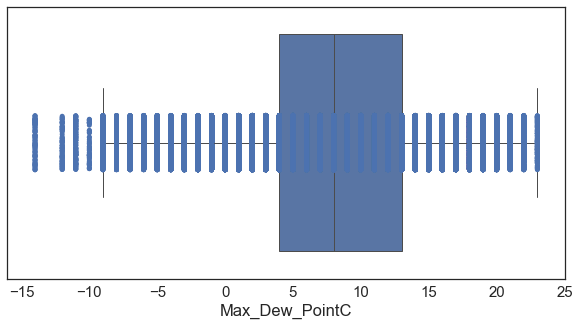

In [47]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

plt.figure(figsize=(10,5))  
sns.boxplot(x='Max_Dew_PointC',data=all_data)
sns.stripplot(x='Max_Dew_PointC',data=all_data,jitter=True)

In [48]:
WinsorizingIQR(all_data,'Max_Dew_PointC')

Outliers := 0.9314083097229526 %


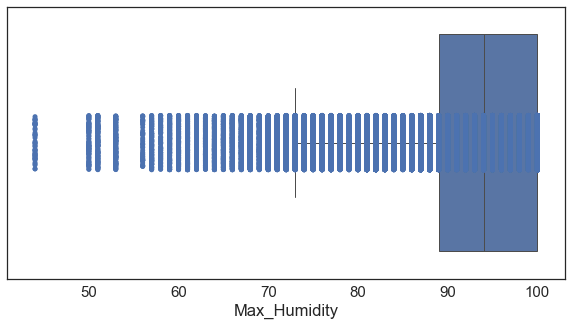

In [49]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

plt.figure(figsize=(10,5))  
sns.boxplot(x='Max_Humidity',data=all_data)
sns.stripplot(x='Max_Humidity',data=all_data,jitter=True)

In [50]:
WinsorizingIQR(all_data,'Max_Humidity')

Outliers := 4.869534974466858 %


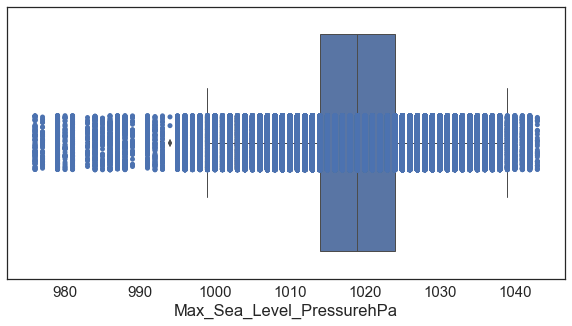

In [51]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

plt.figure(figsize=(10,5))  
sns.boxplot(x='Max_Sea_Level_PressurehPa',data=all_data)
sns.stripplot(x='Max_Sea_Level_PressurehPa',data=all_data,jitter=True)

In [52]:
WinsorizingIQR(all_data,'Max_Sea_Level_PressurehPa')

Outliers := 5.740291468028434 %


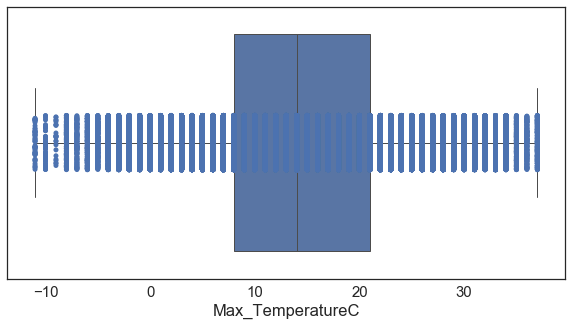

In [53]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

plt.figure(figsize=(10,5))  
sns.boxplot(x='Max_TemperatureC',data=all_data)
sns.stripplot(x='Max_TemperatureC',data=all_data,jitter=True)

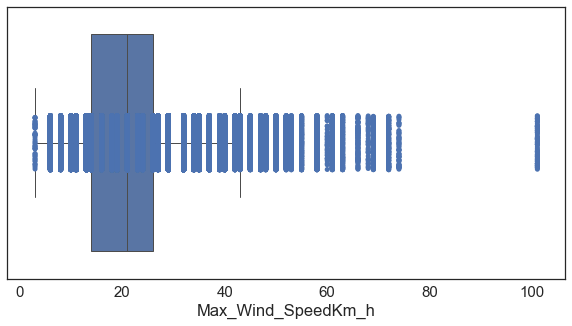

In [54]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

plt.figure(figsize=(10,5))  
sns.boxplot(x='Max_Wind_SpeedKm_h',data=all_data)
sns.stripplot(x='Max_Wind_SpeedKm_h',data=all_data,jitter=True)

In [55]:
WinsorizingIQR(all_data,'Max_Wind_SpeedKm_h')

Outliers := 5.243837266511715 %


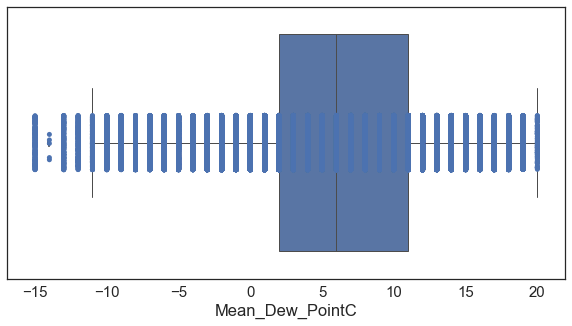

In [56]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

plt.figure(figsize=(10,5))  
sns.boxplot(x='Mean_Dew_PointC',data=all_data)
sns.stripplot(x='Mean_Dew_PointC',data=all_data,jitter=True)

In [57]:
WinsorizingIQR(all_data,'Mean_Dew_PointC')

Outliers := 0.8968410158967137 %


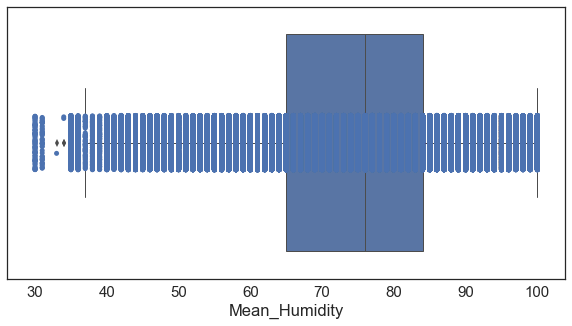

In [58]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

plt.figure(figsize=(10,5))  
sns.boxplot(x='Mean_Humidity',data=all_data)
sns.stripplot(x='Mean_Humidity',data=all_data,jitter=True)

In [59]:
WinsorizingIQR(all_data,'Mean_Humidity')

Outliers := 1.6814973788236092 %


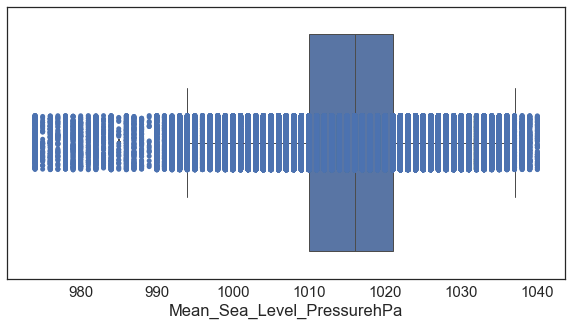

In [60]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

plt.figure(figsize=(10,5)) 
sns.boxplot(x='Mean_Sea_Level_PressurehPa',data=all_data)
sns.stripplot(x='Mean_Sea_Level_PressurehPa',data=all_data,jitter=True)

In [61]:
WinsorizingIQR(all_data,'Mean_Sea_Level_PressurehPa')

Outliers := 4.11350796532243 %


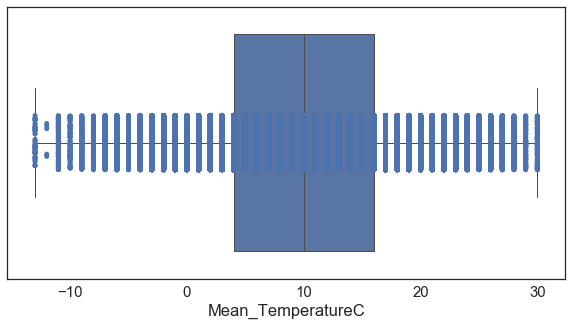

In [62]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

plt.figure(figsize=(10,5))  
sns.boxplot(x='Mean_TemperatureC',data=all_data)
sns.stripplot(x='Mean_TemperatureC',data=all_data,jitter=True)

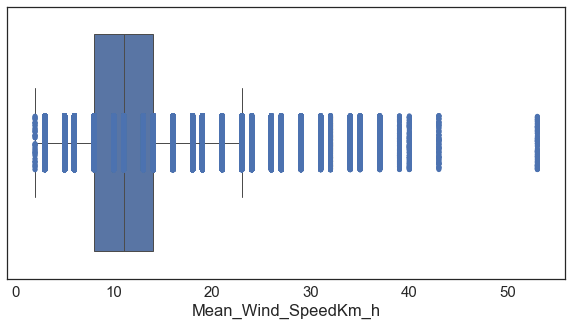

In [63]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

plt.figure(figsize=(10,5))  
sns.boxplot(x='Mean_Wind_SpeedKm_h',data=all_data)
sns.stripplot(x='Mean_Wind_SpeedKm_h',data=all_data,jitter=True)

In [64]:
WinsorizingIQR(all_data,'Mean_Wind_SpeedKm_h')

Outliers := 9.20698810715437 %


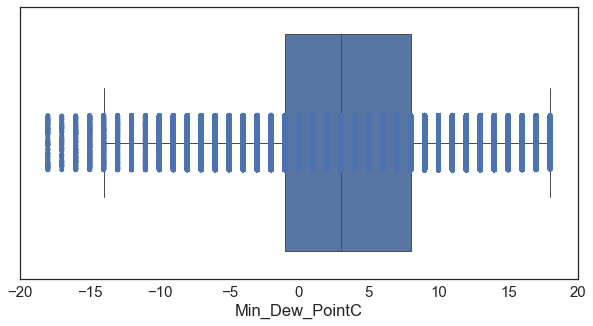

In [65]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

plt.figure(figsize=(10,5))  
sns.boxplot(x='Min_Dew_PointC',data=all_data)
sns.stripplot(x='Min_Dew_PointC',data=all_data,jitter=True)

In [66]:
WinsorizingIQR(all_data,'Min_Dew_PointC')

Outliers := 0.9717014743056852 %


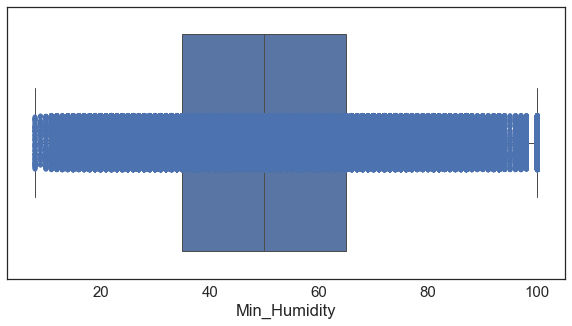

In [67]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

plt.figure(figsize=(10,5))  
sns.boxplot(x='Min_Humidity',data=all_data)
sns.stripplot(x='Min_Humidity',data=all_data,jitter=True)

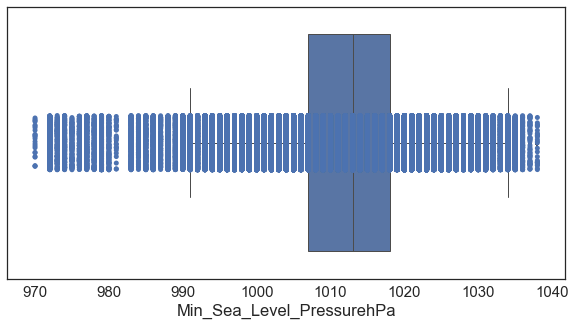

In [68]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

plt.figure(figsize=(10,5))  
sns.boxplot(x='Min_Sea_Level_PressurehPa',data=all_data)
sns.stripplot(x='Min_Sea_Level_PressurehPa',data=all_data,jitter=True)

In [69]:
WinsorizingIQR(all_data,'Min_Sea_Level_PressurehPa')

Outliers := 5.591206759072324 %


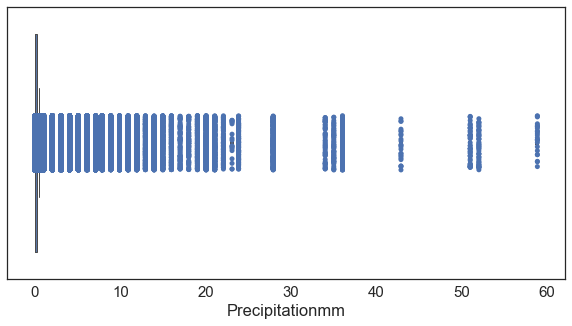

In [70]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

plt.figure(figsize=(10,5))  
sns.boxplot(x='Precipitationmm',data=all_data)
sns.stripplot(x='Precipitationmm',data=all_data,jitter=True)


 mu = 0.77 and sigma = 2.57

Skewness: 7.664792
Kurtosis: 93.650865


Text(0.5,1,'Precipitationmm distribution')

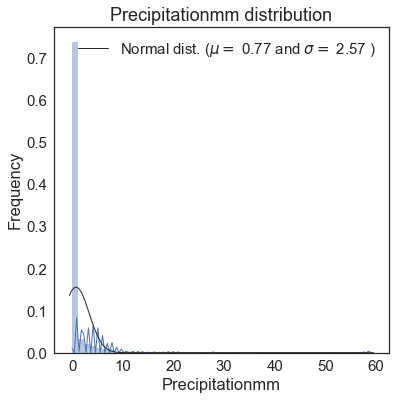

In [71]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

sns.distplot(all_data['Precipitationmm'] , fit=stats.norm)


(mu, sigma) = stats.norm.fit(all_data['Precipitationmm'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % all_data['Precipitationmm'].skew())
print("Kurtosis: %f" % all_data['Precipitationmm'].kurt())

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Precipitationmm distribution')

In [72]:
all_data["Precipitationmm"] = np.log1p(all_data["Precipitationmm"])
(mu, sigma) = stats.norm.fit(train['Precipitationmm'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % all_data['Precipitationmm'].skew())
print("Kurtosis: %f" % all_data['Precipitationmm'].kurt())


 mu = 0.80 and sigma = 2.65

Skewness: 2.444737
Kurtosis: 5.760925


Text(0.5,1,'Precipitationmm distribution')

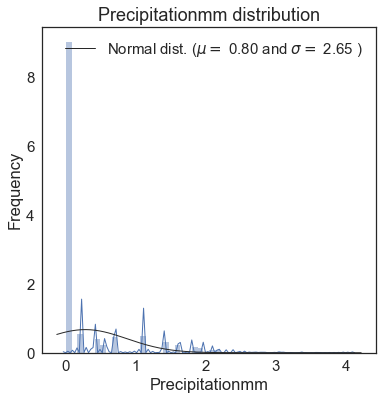

In [73]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
sns.distplot(all_data['Precipitationmm'] , fit=stats.norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Precipitationmm distribution')

In [74]:
100*all_data.loc[all_data['Precipitationmm'] == 0].shape[0]/all_data.shape[0]

73.75239638294623

# Analyzing missing values

In [75]:
ratios = (all_data.isnull().sum() / len(all_data))*100
rate = ratios.drop(ratios[ratios == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :rate})
missing_data

,Missing Ratio
Max_Gust_SpeedKm_h,78.504657
CloudCover,8.810419
Min_VisibilitykM,2.419286
Mean_VisibilityKm,2.419286
Max_VisibilityKm,2.419286


Text(0.5,1,'Top Variables for % of Missing Values')

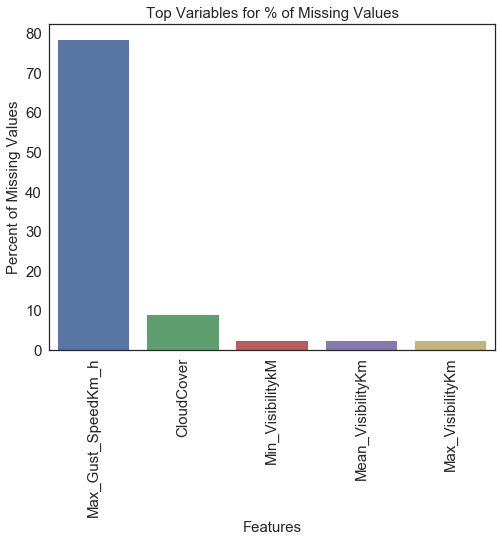

In [76]:
plt.subplots(figsize=(8,6))
plt.xticks(rotation='90')
sns.barplot(x=rate.index[:10], y=rate[:10])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('Top Variables for % of Missing Values', fontsize=15)

## Droppinng Max_Gust_SpeedKm_h  
Too many missing values

In [77]:
all_data = all_data.drop(labels='Max_Gust_SpeedKm_h', axis=1)

## Imputing CloudCover  
Filling missing values with median to preserve an integer value

In [78]:
all_data["CloudCover"] = all_data["CloudCover"].transform(lambda x: x.fillna(x.median()))

## Categorical Selection

### CloudCover

CloudCover attribute will be transformed to a binary variable zeroClouds, since we noticed a uniform behaviour in the sales for Cloud Cover values from 1 to 9 and a different behaviour for CloudCover = 0.

In [79]:
all_data['ZeroClouds'] = all_data['CloudCover'].apply(lambda x: 1 if x==0 else 0);
all_data = all_data.drop(labels='CloudCover',axis=1);

In [80]:
all_data['ZeroClouds'].describe()

count    471544.000000
mean          0.000238
std           0.015410
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: ZeroClouds, dtype: float64

## Imputing Visibility

In [81]:
mean_of_min = math.ceil(all_data.loc[~np.isnan(all_data['Min_VisibilitykM'])]['Min_VisibilitykM'].describe()['mean'])
mean_of_max = math.ceil(all_data.loc[~np.isnan(all_data['Max_VisibilityKm'])]['Max_VisibilityKm'].describe()['mean'])
mean_of_mean = math.ceil(all_data.loc[~np.isnan(all_data['Max_VisibilityKm'])]['Max_VisibilityKm'].describe()['mean'])

In [82]:
all_data['Max_VisibilityKm'] = all_data['Max_VisibilityKm'].fillna(mean_of_max)
all_data['Min_VisibilitykM'] = all_data['Min_VisibilitykM'].fillna(mean_of_min)
all_data['Mean_VisibilityKm'] = all_data['Mean_VisibilityKm'].fillna(mean_of_mean)

In [83]:
ratios = (all_data.isnull().sum() / len(all_data))*100
rate = ratios.drop(ratios[ratios == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :rate})
missing_data

,Missing Ratio


Computing Humidex Index

In [84]:
all_data['Mean_H'] = np.ceil(all_data['Mean_TemperatureC'] + 0.5555 * (6.11*np.exp(5417.7530*(1/273.16 - 1/(273.16 + all_data['Mean_Dew_PointC'])) - 10)))

In [85]:
all_data['Max_H'] = np.ceil(all_data['Max_TemperatureC'] + 0.5555 * (6.11*np.exp(5417.7530*(1/273.16 - 1/(273.16 + all_data['Max_Dew_PointC'])) - 10)))

In [86]:
all_data['Min_H'] = np.ceil(all_data['Min_TemperatureC'] + 0.5555 * (6.11*np.exp(5417.7530*(1/273.16 - 1/(273.16 + all_data['Min_Dew_PointC'])) - 10)))

Computing Wind Chill Index

In [87]:
all_data['Mean_WCI'] = 13.12 + 0.6215*all_data['Mean_TemperatureC'] - 11.37*np.power(all_data['Mean_Wind_SpeedKm_h'],0.16) + 0.3965*all_data['Mean_TemperatureC']*np.power(all_data['Mean_Wind_SpeedKm_h'],0.16)

In [88]:
all_data['Max_WCI'] = 13.12 + 0.6215*all_data['Max_TemperatureC'] - 11.37*np.power(all_data['Max_Wind_SpeedKm_h'],0.16) + 0.3965*all_data['Max_TemperatureC']*np.power(all_data['Max_Wind_SpeedKm_h'],0.16)

Computing Australian  Apparent Temperature

In [89]:
all_data['Mean_AT'] = all_data['Mean_TemperatureC'] + 0.33*(all_data['Mean_Humidity']/100)*6.105*np.exp(17.27*all_data['Mean_TemperatureC']/(273.15 + all_data['Mean_TemperatureC'])) -0.7*all_data['Mean_Wind_SpeedKm_h']*10/36 - 4

In [90]:
all_data['Mean_AT'] = all_data['Max_TemperatureC'] + 0.33*(all_data['Max_Humidity']/100)*6.105*np.exp(17.27*all_data['Max_TemperatureC']/(273.15 + all_data['Mean_TemperatureC'])) -0.7*all_data['Max_Wind_SpeedKm_h']*10/36 - 4

In [91]:
test_offset = train.shape[0]
train = all_data.iloc[0:test_offset,:]
train = train.drop(labels='StoreID', axis=1)
test = all_data.iloc[test_offset:all_data.shape[0],:]

Saves test

In [92]:
test = test.drop(labels = 'Max_Dew_PointC',axis=1)
test = test.drop(labels = 'Max_Humidity',axis=1)
test = test.drop(labels = 'Max_Sea_Level_PressurehPa',axis=1)
test = test.drop(labels = 'Min_Dew_PointC',axis=1)
test = test.drop(labels = 'Min_Humidity',axis=1)
test = test.drop(labels = 'Min_Sea_Level_PressurehPa',axis=1)
test = test.drop(labels = 'Min_TemperatureC',axis=1)
test = test.drop(labels = 'Min_VisibilitykM',axis=1)
test = test.drop(labels = 'Max_TemperatureC',axis=1)
test = test.drop(labels = 'Max_VisibilityKm',axis=1)
test = test.drop(labels = 'Max_Wind_SpeedKm_h',axis=1)
test.to_csv("TestClean.csv")

Save train

In [93]:
train = train.drop(labels = 'Max_Dew_PointC',axis=1)
train = train.drop(labels = 'Max_Humidity',axis=1)
train = train.drop(labels = 'Max_Sea_Level_PressurehPa',axis=1)
train = train.drop(labels = 'Min_Dew_PointC',axis=1)
train = train.drop(labels = 'Min_Humidity',axis=1)
train = train.drop(labels = 'Min_Sea_Level_PressurehPa',axis=1)
train = train.drop(labels = 'Min_TemperatureC',axis=1)
train = train.drop(labels = 'Min_VisibilitykM',axis=1)
train = train.drop(labels = 'Max_TemperatureC',axis=1)
train = train.drop(labels = 'Max_VisibilityKm',axis=1)
train = train.drop(labels = 'Max_Wind_SpeedKm_h',axis=1)
train['NumberOfSales'] = train_target
train['NumberOfCustomers'] = NumberOfCustomers 
train.to_csv("TrainClean.csv")

# Computing Correlation  

Numerical correlation, using Pearson Correlation

In [94]:
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures

In [95]:
def compute_corr(df,var,degree,tar):
    new_dataset = df
    current_column = var
    corr = {}
    indexes = []
    for d in range(2,degree+1):
        column_name = var+" at the power of " + str(d)
        new_dataset[column_name] = new_dataset[current_column]*df[var]
        corr[column_name] = new_dataset[column_name].corr(new_dataset[tar],method='pearson',min_periods=1)
        current_column = column_name
        indexes.append(current_column)
    
    if (df[var].values > 0).all():
        column_name = var+"logbase2"   
        new_dataset[column_name] = np.log2(df[var])
        indexes.append(current_column)
        corr[column_name] = new_dataset[column_name].corr(new_dataset[tar],method='pearson',min_periods=1)
        column_name = var+"logbase10"
        new_dataset[column_name] = np.log10(df[var])
        indexes.append(current_column)
        corr[column_name] = new_dataset[column_name].corr(new_dataset[tar],method='pearson',min_periods=1)
    
    return corr,indexes

In [96]:
bool_cols = [col for col in train if train[col].dropna().value_counts().index.isin([0,1]).all()]
binary_variables = pd.Index(bool_cols)

In [99]:
continous_variables = train.columns.difference(binary_variables)

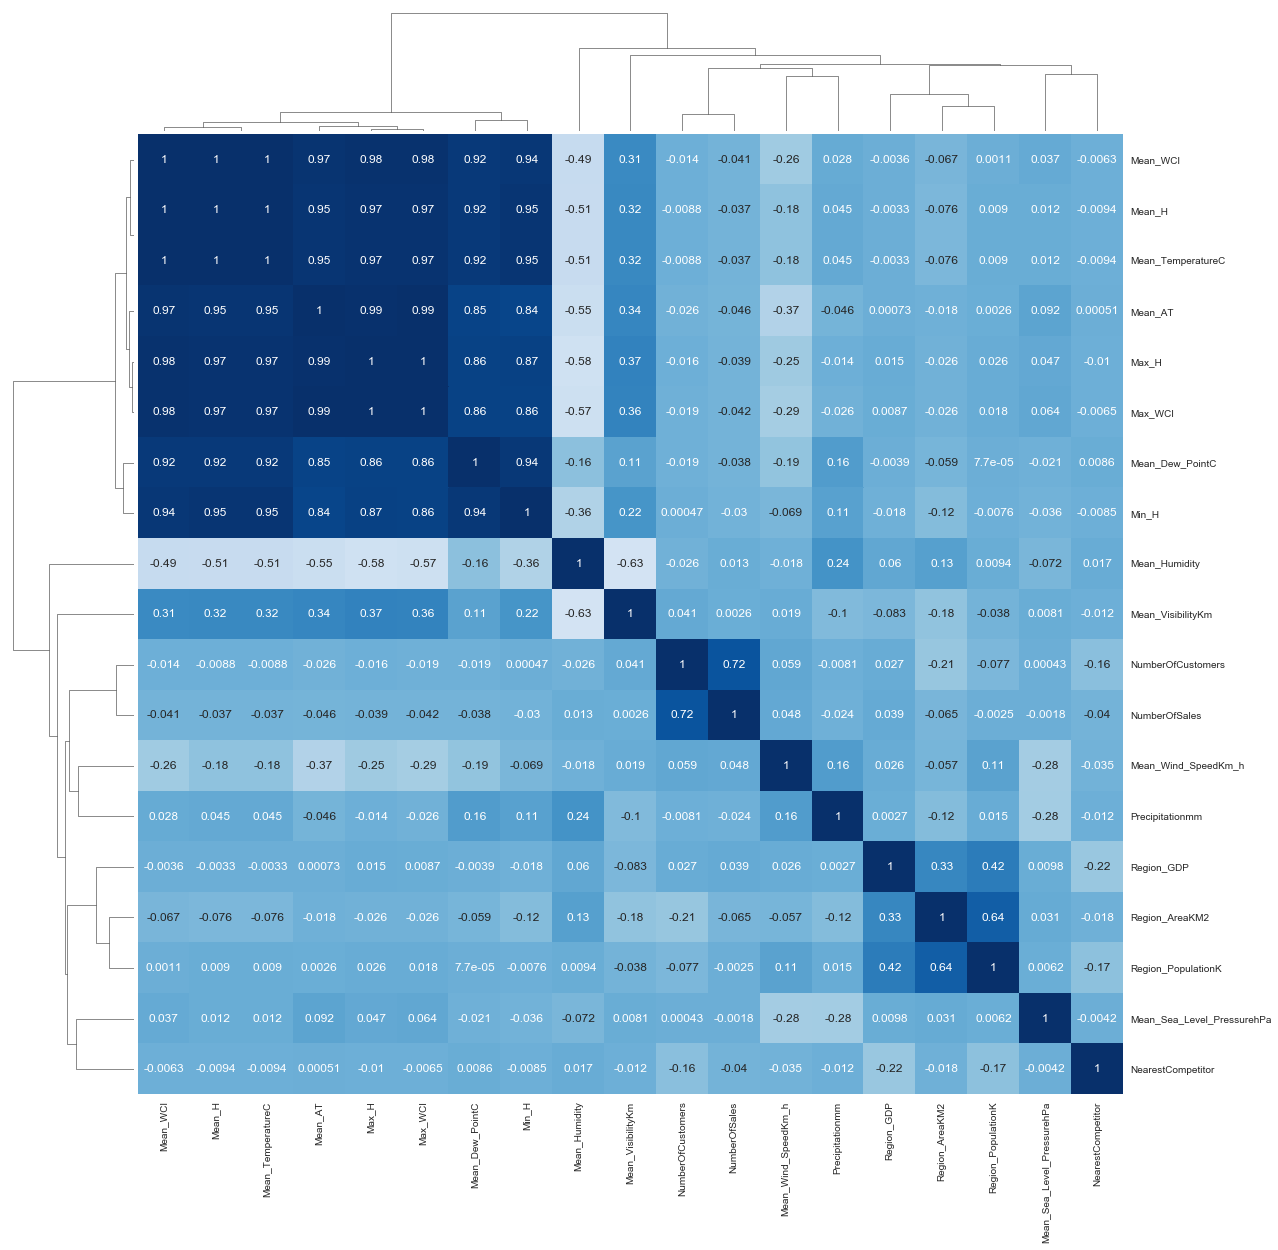

In [102]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
cov=train[continous_variables].corr(method='pearson')
cm = sns.clustermap(cov, annot=True, center=0, cmap="Blues", figsize=(20, 20))
cm.cax.set_visible(False)

In [103]:
cov.loc[np.absolute(cov['NumberOfSales']) > 0.6]['NumberOfSales']

NumberOfCustomers    0.71892
NumberOfSales        1.00000
Name: NumberOfSales, dtype: float64

In [104]:
cov.loc[np.absolute(cov['NumberOfCustomers']) > 0.6]['NumberOfCustomers']

NumberOfCustomers    1.00000
NumberOfSales        0.71892
Name: NumberOfCustomers, dtype: float64

# Computing correlations of interactions among features

In [105]:
X = train[continous_variables].values
poly = PolynomialFeatures(degree =2,include_bias=False,interaction_only=True)
Y = poly.fit_transform(X)

In [106]:
new_cols = poly.get_feature_names(input_features=train[continous_variables].columns)

In [ ]:
new_data = pd.DataFrame(data=Y,columns=new_cols)

In [ ]:
cov = new_data.corr(method='pearson')

In [ ]:
cov.loc[cov['NumberOfSales'] > 0.6]['NumberOfSales']

In [ ]:
cov.loc[cov['NumberOfCustomers'] > 0.6]['NumberOfCustomers']

In [ ]:
correlations = {}
indexes = {}
for v in continous_variables:
    correlations[v],indexes[v] = compute_corr(train,v,4,'NumberOfSales');

In [ ]:
for v in continous_variables:
    for k in indexes[v]:
        if (np.absolute(correlations[v][k]) > 0.6 and v!='NumberOfSales'):
            print(" Pearson Correlation:="+str(correlations[v][k]))

In [ ]:
correlations = {}
indexes = {}
for v in continous_variables:
    correlations[v],indexes[v] = compute_corr(train,v,4,'NumberOfCustomers');

In [ ]:
for v in continous_variables:
    for k in indexes[v]:
        if (np.absolute(correlations[v][k]) > 0.6 and v!='NumberOfCustomers' and v!='NumberOfSales'):
            print(k+"Pearson Correlation:="+str(correlations[v][k]))

In [ ]:
point_biserial = {}
for col in binary_variables:
        point_biserial[col] = round(stats.pointbiserialr(train[col].values,train["NumberOfSales"].values)[0],3)
        if (np.absolute(point_biserial[col]) > 0.1):
            print(col+" Point Biserial Correlation:="+str(point_biserial[col]))

In [ ]:
point_biserial_1 = {}
for col in binary_variables:
        point_biserial_1[col] = round(stats.pointbiserialr(train[col].values,train["NumberOfCustomers"].values)[0],3)
        if (np.absolute(point_biserial[col]) > 0.1):
            print(col+" Point Biserial Correlation:="+str(point_biserial_1[col]))